In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## 2. Load the data

In [2]:
df = pd.read_csv('fifa21_male2.csv')
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


## 3. Explore the data (cleaning)

In [3]:
# ## 3. Explore data

# - Change headers names.
# - Deal with NaN values.
# - Categorical Features.
# - Numerical Features.
# - Exploration.

In [4]:
# Columns:Lower case and replace space to '_'
df.columns = [columns.lower().replace(' ', '_') for columns in df.columns]

In [5]:
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [6]:
df.shape

(17125, 107)

In [7]:
# rename the columns to make it readable
df = df.rename(columns = {'ova':'overall_rating',
                         'bov' : 'best_overall',
                         'bp' : 'best_position',
                         'team_&_contract' : 'team_contract',
                         'pot' : 'potential',
                         'w/f' : 'week_foot_rate',
                         'a/w' : 'attacking_work_rate',
                         'd/w' : 'defense_work_rate',
                         'ir' : 'international_reputation',
                         'pac' : 'pace',
                         'sho' : 'shooting',
                         'pas' : 'passing',
                         'dri' : 'dribbling',
                         'def' : 'defending',
                         'phy' : 'physical',
                         'ls' : 'left_strike',
                         'st' : 'striker',
                         'rs' : 'right_striker',
                         'lw' : 'left_winger',
                         'lf' : 'left_forward',
                         'cf' : 'center_forward',
                         'rf' : 'right_forward',
                         'rw' : 'right_winger',
                         'lam' : 'left_attacking_mf',
                         'cam' : 'center_attacking_mf',
                         'ram' : 'right_attacking_mf',
                         'lm' : 'left_mf',
                         'lcm' : 'left_center_mf',
                          'cm' : 'center_mf',
                         'rcm' : 'right_center_mf',
                         'rm' : 'right_mf',
                         'lwb' : 'left_wing_back',
                         'ldm' : 'left_defence_mf',
                         'cdm' : 'central_defence_mf',
                         'rdm' : 'right_defence_mf',
                         'lb' : 'left_back',
                         'lcb' : 'left_center_back',
                         'cb' : 'center_back',
                         'rcb' : 'right_center_back',
                         'rb' : 'right_back',
                         'gk' : 'goal_keeper',
                         'sm' : 'skill_move'})

In [8]:
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,

In [9]:
# Removing duplicates
df = df.drop_duplicates() 
df.shape

(17125, 107)

### Dealing with Null values


In [10]:
#counting the total null values in df
df.isna().sum().sum()

17753

In [11]:
#check null values in each column
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)
    

id , 0
name , 0
age , 0
overall_rating , 0
nationality , 0
club , 23
best_overall , 0
best_position , 0
position , 413
player_photo , 0
club_logo , 23
flag_photo , 0
potential , 0
team_contract , 0
height , 0
weight , 0
foot , 0
growth , 0
joined , 58
loan_date_end , 16215
value , 0
wage , 0
release_clause , 0
contract , 0
attacking , 0
crossing , 0
finishing , 0
heading_accuracy , 0
short_passing , 0
volleys , 58
skill , 0
dribbling , 0
curve , 58
fk_accuracy , 0
long_passing , 0
ball_control , 0
movement , 0
acceleration , 0
sprint_speed , 0
agility , 58
reactions , 0
balance , 58
power , 0
shot_power , 0
jumping , 58
stamina , 0
strength , 0
long_shots , 0
mentality , 0
aggression , 0
interceptions , 7
positioning , 7
vision , 58
penalties , 0
composure , 423
defending , 0
marking , 0
standing_tackle , 0
sliding_tackle , 58
goalkeeping , 0
gk_diving , 0
gk_handling , 0
gk_kicking , 0
gk_positioning , 0
gk_reflexes , 0
total_stats , 0
base_stats , 0
week_foot_rate , 0
skill_move , 0


In [12]:
# 1. Check'loan_date_end'
df['loan_date_end'].value_counts()

Jun 30, 2021    556
Jun 30, 2020    112
Dec 31, 2020     77
Jun 30, 2019     24
Jun 30, 2018     19
May 31, 2021     17
Dec 31, 2021     15
Jan 31, 2021     14
Jun 30, 2022     11
Jan 1, 2021       9
Nov 30, 2020      6
Jun 30, 2017      6
Nov 27, 2021      5
May 31, 2019      5
Jun 23, 2021      4
May 31, 2020      3
May 31, 2018      2
Dec 31, 2019      2
Jun 1, 2021       2
Jan 3, 2021       2
Jun 30, 2014      2
Jan 17, 2021      1
Jan 30, 2021      1
Jun 30, 2016      1
Dec 30, 2020      1
Apr 30, 2015      1
Jun 30, 2023      1
Jul 5, 2021       1
Aug 31, 2021      1
May 25, 2016      1
Jul 1, 2021       1
Jan 2, 2016       1
Jun 30, 2015      1
May 31, 2022      1
Dec 30, 2021      1
Aug 31, 2020      1
Jan 4, 2021       1
Jul 31, 2021      1
Name: loan_date_end, dtype: int64

In [13]:
# Drop the column loan_date_end as it is so little filled. 
df = df.drop(['loan_date_end'], axis=1)
df

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,7

In [14]:
df['composure'].value_counts()

65.0    667
58.0    632
60.0    625
62.0    624
64.0    608
       ... 
93.0      2
96.0      1
16.0      1
17.0      1
95.0      1
Name: composure, Length: 84, dtype: int64

In [15]:
composure_mean = round(df['composure'].mean())
composure_mean

60

In [16]:
df['composure'] = df['composure'] .fillna(composure_mean)

In [17]:
df['position'].value_counts()

CB              2047
ST              1818
GK              1517
CDM CM           748
LB               654
                ... 
LWB LM LB LW       1
LW LB CAM          1
LW LWB RWB         1
ST RB RM           1
RW RM LM           1
Name: position, Length: 622, dtype: int64

In [18]:
df['position'] = df['position'] .fillna('CB')
df['position'].value_counts()
df.isna().sum().sum()

702

In [19]:
# Fill in the mean of below columns
#volleys , 58
#curve , 58
#agility , 58
#balance , 58
#jumping , 58
#vision , 58
#sliding_tackle , 58
#attacking_work_rate , 89
#defense_work_rate , 89
df['volleys'] = df['volleys'] .fillna(composure_mean)
df['curve'] = df['curve'] .fillna(composure_mean)
df['agility'] = df['agility'] .fillna(composure_mean)
df['balance'] = df['balance'] .fillna(composure_mean)
df['jumping'] = df['jumping'] .fillna(composure_mean)
df['vision'] = df['vision'] .fillna(composure_mean)
df['sliding_tackle'] = df['sliding_tackle'] .fillna(composure_mean)
df['attacking_work_rate'] = df['attacking_work_rate'] .fillna(composure_mean)
df['defense_work_rate'] = df['defense_work_rate'] .fillna(composure_mean)
df.isna().sum().sum()

118

In [20]:
#club , 23

df['club'].value_counts()

Manchester United        45
Chelsea                  45
Bolton Wanderers         45
Sunderland               43
AS Monaco                43
                         ..
Eskişehirspor             1
FC Arouca                 1
Al Orobah                 1
San Martin de Tucumán     1
Figueirense               1
Name: club, Length: 917, dtype: int64

In [21]:
df['club'] = df['club'].fillna('Bolton Wanderers')

In [22]:
#joined , 58
df['joined'].value_counts()

Jul 1, 2019     1176
Jul 1, 2018      889
Jul 1, 2017      569
Jan 1, 2019      391
Jul 1, 2020      329
                ... 
Aug 1, 2004        1
Sep 1, 2011        1
Feb 4, 2013        1
Jul 14, 2011       1
Jul 19, 2015       1
Name: joined, Length: 1953, dtype: int64

In [23]:
df['joined'] = df['joined'].fillna('Jul 1, 2019')
df['joined'].value_counts()

Jul 1, 2019     1234
Jul 1, 2018      889
Jul 1, 2017      569
Jan 1, 2019      391
Jul 1, 2020      329
                ... 
Aug 1, 2004        1
Sep 1, 2011        1
Feb 4, 2013        1
Jul 14, 2011       1
Jul 19, 2015       1
Name: joined, Length: 1953, dtype: int64

In [24]:
df.isna().sum().sum()

37

In [25]:
# drop the rests
df = df.dropna()
df.shape

(17095, 106)

### Clean up the data types: Check the numerical and categorical data and correct


In [26]:
num = df.select_dtypes('int64', 'float')
num

,id,age,overall_rating,best_overall,potential,growth,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pace,shooting,passing,dribbling,defending,physical
0,2,33,69,71,69,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,259090,18,56,58,66,10,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,259091,18,56,56,67,11,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,259101,20,62,62,73,11,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


In [27]:
cat = df.select_dtypes('object')
cat

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,height,weight,foot,joined,value,wage,release_clause,contract,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,3 ★,2★,Medium,High,2 ★,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",165lbs,Right,"Jul 1, 2019",€0,€0,€0,2009,3 ★,1★,60,60,1 ★,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",2 ★,2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flag

In [28]:
# Check unique values in categorical columns
for column in cat.columns:
    print(column, cat[column].unique())

name ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
nationality ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Bulgaria'
 'Poland' 'United States' 'Mali' 'Finland' 'Iceland' 'Czech Republic'
 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel' 'Cameroon'
 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Austria' 'Algeria'
 'Morocco' 'Albania' 'North Macedonia' 'Slovenia' 'Madagascar' 'Croatia'
 'Kosovo' 'Estonia' 'Moldova' 'Bosnia Herzegovina' 'Russia' 'Romania'
 'Antigua &amp; Barbuda' 'Burkina Faso' 'Panama' 'Gibraltar' 'Venezuela'
 'Benin' 'Cyprus' 'Iran' 'Haiti' 'Slovakia' 'Ecu

In [29]:
# height: convert height into cm
df['height'] = df['height'].str.replace('"', '')
df['height'] = df['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

In [30]:
# weight : convert weight into kg
df['weight'] = df['weight'].str.replace("lbs", "")
df['weight']= df['weight'].apply(lambda x: int(x)*0.45)
df['weight']

0        81.45
1        64.35
2        72.45
3        74.25
4        67.50
         ...  
17120    74.25
17121    76.50
17122    69.30
17123    66.60
17124    69.30
Name: weight, Length: 17095, dtype: float64

In [31]:
# height and weight: convert into int
df['height'] = df["height"].astype(int)
df['weight'] = df['weight'].astype(int)

In [32]:
# Value/wage/release_clause

df['value'] = df['value'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['wage'] = df['wage'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['release_clause'] = df['release_clause'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
df['hits'] = df['hits'].replace({'€':'', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')

#df['Val'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
#reference: https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe


In [33]:
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,"Jul 19, 2014",600000,7000,1100000,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,"Jan 7, 2016",1100000,15000,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,"Jul 1, 2019",0,0,0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3 ★,1★,60,60,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,"Jul 16, 2018",5500000,12000,7200000,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71

In [34]:
# Covert value, wage and release_clause to 1000/K units
df['value'] = df['value']/1000
df['value'] 

0         625.0
1         600.0
2        1100.0
3           0.0
4        5500.0
          ...  
17120     550.0
17121     130.0
17122     130.0
17123     475.0
17124     325.0
Name: value, Length: 17095, dtype: float64

In [35]:
df['wage'] = df['wage']/1000
df['release_clause'] = df['release_clause']/1000
df = df.rename(columns = {'value' : 'value_k',
                          'wage' : 'wage_k',
                          'release_clause' : 'release_clause_k'})

In [36]:
df.head()

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,joined,value_k,wage_k,release_clause_k,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,"Jul 1, 2008",625.0,7.0,0.0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,"Jul 19, 2014",600.0,7.0,1100.0,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,"Jan 7, 2016",1100.0,15.0,0.0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,"Jul 1, 2019",0.0,0.0,0.0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3 ★,1★,60,60,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,"Jul 16, 2018",5500.0,12.0,7200.0,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,9

In [37]:
df.dtypes['value_k']

dtype('float64')

In [38]:
# change value, wage and release_clause from float to int

df['value_k'] = df["value_k"].astype(int)
df['wage_l'] = df['wage_k'].astype(int)
df['release_clause_k'] = df['release_clause_k'].astype(int)

In [39]:
# remove the stars from week_foot_rate, sm, international_reputation and change to numerical
df['week_foot_rate'] = [column.replace("★", "") for column in df['week_foot_rate']]
df['skill_move'] = [column.replace("★", "") for column in df['skill_move']]
df['international_reputation'] = [column.replace("★", "") for column in df['international_reputation']]


In [40]:
# joined : extract the year and call 'joined_year'
df['joined'] = pd.to_datetime(df['joined'])
df['joined_year'] = df['joined'].dt.strftime('%Y')

In [41]:
# drop 'joined'
df = df.drop(['joined'], axis =1)

In [42]:
# contract : split into contract_start and contract_end
df[['contract_start', 'contract_end']] = df.contract.str.split("~",expand=True)


In [43]:
df['contract_start']

0                       2008 
1                       2014 
2                       2016 
3                        2009
4                       2018 
                 ...         
17120    Jun 30, 2021 On Loan
17121                   2020 
17122                   2020 
17123                   2020 
17124                   2020 
Name: contract_start, Length: 17095, dtype: object

In [44]:

df['contract_start'] = df['contract_start'].str.replace('Jun 30, 2021 On Loan', '2021')

df['contract_start'] = df['contract_start'].str.replace('Jun 30, 2020 On Loan', '2020')

df['contract_start'] = df['contract_start'].str.replace('Dec 31, 2020 On Loan', '2020')
df['contract_start'].value_counts()[:50]
#df['contract_start']


2019                    4357
2020                    3882
2018                    2788
2017                    1736
2016                    1000
2015                     612
2021                     554
2014                     409
Free                     309
2013                     269
2020                     188
2012                     179
2011                     136
2010                      89
2009                      50
2008                      42
2007                      28
Jun 30, 2019 On Loan      24
2005                      21
May 31, 2021 On Loan      17
Jun 30, 2018 On Loan      15
Dec 31, 2021 On Loan      15
Jan 31, 2021 On Loan      14
2006                      13
2007                      13
Jun 30, 2022 On Loan      11
2003                      10
2008                       9
2010                       9
Jan 1, 2021 On Loan        9
2009                       8
2004                       7
Ivory Coast Free           7
Nov 30, 2020 On Loan       6
1998          

In [45]:
#change contract_start to numeric and drop rows which cannot be converted
df['contract_start'] =  pd.to_numeric(df['contract_start'], errors='coerce')

#df['contract_start'].astype(int), errors='coerce'

In [46]:
df['contract_start'].value_counts()

2019.0      4357
2020.0      4070
2018.0      2788
2017.0      1736
2016.0      1000
2015.0       612
2021.0       554
2014.0       409
2013.0       270
2012.0       179
2011.0       137
2010.0        98
2009.0        58
2008.0        51
2007.0        41
2005.0        21
2006.0        13
2003.0        10
2004.0         7
2002.0         6
1998.0         6
2001.0         3
111648.0       3
1999.0         2
1993.0         2
2000.0         2
1990.0         1
1992.0         1
1991.0         1
1996.0         1
1995.0         1
Name: contract_start, dtype: int64

In [47]:
df.drop(df.loc[df['contract_start']==111648].index, inplace=True)
df.shape

(17092, 109)

In [48]:
df['contract_start'].dtypes

dtype('float64')

In [49]:
# Here I want to convert it into int but shows error... i cannot figure it why
#df['contract_start'] = df['contract_start'].astype(int)

In [50]:
df['contract_end']
#df['contract_end'].astype(str).astype(int)

0         2016
1         2019
2         2020
3         None
4         2021
         ...  
17120     None
17121     2021
17122     2022
17123     2023
17124     2024
Name: contract_end, Length: 17092, dtype: object

In [51]:
df['contract_end'].isna().sum()

1267

In [52]:
df['contract_end'].value_counts()




 2021    4847
 2022    3699
 2023    2811
 2020    1712
 2024    1580
 2025     433
 2019     257
 2018     126
 2017      93
 2016      80
 2015      60
 2014      46
 2013      29
 2012      26
 2011      20
 2026       4
 2027       1
 2028       1
Name: contract_end, dtype: int64

In [53]:
#fillin the null values with the highest number of contract date 
df['contract_end'] = df['contract_end'] .fillna('2022')

In [54]:
df['contract_end'].isna().sum()

0

In [55]:
df['contract_end'] = df['contract_end'].astype(str).astype(int)

In [56]:
df['contract_end'].dtypes

dtype('int64')

In [57]:
# Clean : attacking_work_rate , 'defence_work_rate'
# Replace 60 to Medium

In [58]:
df[['attacking_work_rate','defense_work_rate']] = df[['attacking_work_rate','defense_work_rate']].replace([60], ['Medium'])

In [59]:
df[['attacking_work_rate','defense_work_rate']]
df['attacking_work_rate'].value_counts()

Medium    11105
High       5138
Low         849
Name: attacking_work_rate, dtype: int64

In [60]:
# From column 'left_strike' to 'goal_keeper' : remove the +'number'


In [61]:
columns = ['left_strike', 
'striker',
'right_striker',
'left_winger',
'left_forward',
'center_forward',
'right_forward',
'right_winger',
'left_attacking_mf',
'center_attacking_mf',
'right_attacking_mf',
'left_mf',
'left_center_mf',
'center_mf',
'right_center_mf',
'right_mf',
'left_wing_back',
'left_defence_mf',
'central_defence_mf',
'right_defence_mf',
'rwb',
'left_back',
'left_center_back',
'center_back',
'right_center_back',
'right_back',
'goal_keeper']


for col in columns:
   df[col]= df[col].str[:2]

df    

,id,name,age,overall_rating,nationality,club,best_overall,best_position,position,player_photo,club_logo,flag_photo,potential,team_contract,height,weight,foot,growth,value_k,wage_k,release_clause_k,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,wage_l,joined_year,contract_start,contract_end
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,182,81,Left,0,625,7.0,0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,7,2008,2008.0,2016
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,177,64,Right,0,600,7.0,1100,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,7,2014,2014.0,2019
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,175,72,Right,0,1100,15.0,0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,15,2016,2016.0,2020
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,180,74,Right,14,0,0.0,0,2009,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,0,2019,2009.0,2022
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,170,67,Right,0,5500,12.0,7200,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,12,2018,2018.0,2021
...,...,...,.

### Apply values to numerical
Go through the columns again and check if any categorical columns are not converted to numerical!

In [62]:
for col in columns:
   df[col]= df[col].apply(pd.to_numeric)

ValueError: Unable to parse string "9+" at position 0

In [64]:
df.select_dtypes('int','float64')

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,wage_l,contract_end
0,2,33,69,71,69,182,81,0,625,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,7,2016
1,16,37,71,70,71,177,64,0,600,1100,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,7,2019
2,27,33,71,71,71,175,72,0,1100,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,2020
3,36,36,68,70,82,180,74,14,0,0,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,0,2022
4,41,36,81,82,81,170,67,0,5500,7200,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,198,74,5,550,0,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,2,2022
17121,259090,18,56,58,66,177,76,10,130,273,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,3,2021
17122,259091,18,56,56,67,175,69,11,130,273,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,2,2022
17123,259101,20,62,62,73,175,66,11,475,784,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,71,34,58,59,59,54,5,48,48,48,55,52,52,52,55,54,54,54,56,55,55,55,56,60,58,58,58,60,60,58,58,58,60,3,2023


In [65]:
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,goal_keeper,gender,joined_year
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,3,2,Medium,High,2,17,Male,2008
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,4,3,Medium,Medium,1,17,Male,2014
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,4,4,Medium,Low,2,15,Male,2016
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,3,1,Medium,Medium,1,22,Male,2019
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,4,4,High,Medium,4,17,Male,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",2,2,Medium,Medium,1,12,Male,2020
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,3,2,Medium,Medium,1,17,Male,2020
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,3,2,Medium,Medium,1,14,Male,2020
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,4,2,High,Medium,1,16,Male,2020


In [66]:
df['goal_keeper'].unique()
df['goal_keeper'] = df['goal_keeper'].str.replace('+', '')


In [67]:
df[["week_foot_rate", "skill_move", "international_reputation", "joined_year", "contract_end"]] = df[["week_foot_rate", "skill_move", "international_reputation", "joined_year", "contract_end"]].apply(pd.to_numeric)

In [68]:
df['goal_keeper'] = df['goal_keeper'].apply(pd.to_numeric)

In [69]:
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,attacking_work_rate,defense_work_rate,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,Medium,High,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,Medium,Medium,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,Medium,Low,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,Medium,Medium,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,High,Medium,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",Medium,Medium,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,Medium,Medium,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,Medium,Medium,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,High,Medium,Male


In [70]:
df.select_dtypes('int', 'float')
df['contract_start']

0        2008.0
1        2014.0
2        2016.0
3        2009.0
4        2018.0
          ...  
17120    2021.0
17121    2020.0
17122    2020.0
17123    2020.0
17124    2020.0
Name: contract_start, Length: 17092, dtype: float64

In [71]:
print('contract_start', df['contract_start'].unique())

contract_start [2008. 2014. 2016. 2009. 2018. 2011. 2019. 1990. 1991. 1993. 2005. 2010.
 2015.   nan 1995. 2012. 2007. 2001. 2020. 2002. 2013. 2006. 2017. 1996.
 2004. 1998. 1999. 1992. 2003. 2021. 2000.]


In [72]:
df['contract_start'].value_counts()

2019.0    4357
2020.0    4070
2018.0    2788
2017.0    1736
2016.0    1000
2015.0     612
2021.0     554
2014.0     409
2013.0     270
2012.0     179
2011.0     137
2010.0      98
2009.0      58
2008.0      51
2007.0      41
2005.0      21
2006.0      13
2003.0      10
2004.0       7
2002.0       6
1998.0       6
2001.0       3
1999.0       2
1993.0       2
2000.0       2
1990.0       1
1992.0       1
1991.0       1
1996.0       1
1995.0       1
Name: contract_start, dtype: int64

In [73]:
df['contract_start'] = df['contract_start'] .fillna('2019')

In [74]:
df['contract_start'] = df['contract_start'].astype(int)

In [75]:
df.select_dtypes('int', 'float')

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,skill,dribbling,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,reactions,power,shot_power,stamina,strength,long_shots,mentality,aggression,penalties,defending,marking,standing_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,wage_l,joined_year,contract_start,contract_end
0,2,33,69,71,69,182,81,0,625,0,313,75,50,59,71,338,73,60,69,71,347,68,74,69,347,74,69,68,68,320,72,50,208,70,69,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,7,2008,2008,2016
1,16,37,71,70,71,177,64,0,600,1100,337,68,64,61,76,369,69,79,71,71,305,56,50,65,324,75,64,60,71,362,71,75,153,70,43,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,7,2014,2014,2019
2,27,33,71,71,71,175,72,0,1100,0,337,80,64,41,77,387,79,77,69,78,295,48,42,59,284,72,29,56,69,317,69,66,99,35,34,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,15,2016,2016,2020
3,36,36,68,70,82,180,74,14,0,0,264,54,70,60,80,255,68,46,64,77,176,59,62,55,239,63,51,66,59,271,59,70,75,34,41,68,5,21,64,21,21,1348,369,3,1,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,0,2019,2009,2022
4,41,36,81,82,81,170,67,0,5500,7200,367,75,69,54,90,408,85,70,83,90,346,61,56,75,297,67,58,62,70,370,58,71,181,68,57,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,12,2018,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,198,74,5,550,0,197,35,23,66,47,193,44,33,34,56,243,52,55,48,279,48,59,74,28,218,69,39,198,61,71,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,2,2020,2021,2022
17121,259090,18,56,58,66,177,76,10,130,273,248,50,43,50,64,264,57,50,61,54,298,61,63,54,271,51,53,57,48,259,51,50,132,34,42,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,5,53,53,53,55,54,54,54,55,56,56,56,56,55,55,55,56,53,52,52,52,53,52,49,49,49,52,17,3,2020,2020,2021
17122,259091,18,56,56,67,175,69,11,130,273,218,55,34,53,42,212,52,34,36,47,308,66,61,59,233,28,53,54,37,256,58,49,163,55,54,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,3,46,46,46,50,47,47,47,50,47,47,47,50,46,46,46,50,54,50,50,50,54,54,54,54,54,54,14,2,2020,2020,2022
17123,259101,20,62,62,73,175,66,11,475,784,223,62,26,52,60,258,55,46,57,57,349,72,70,56,261,51,57,48,33,257,61,36,180,57,62,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,5,48,48,48,55,52,52,52,55,54,54,54,56,55,55,55,56,60,58,58,58,60,60,58,58,58,60,16,3,2020,2020,2023


### Drop irrelavant columns and redundant columns

In [76]:
df.select_dtypes('object')

,name,nationality,club,best_position,position,player_photo,club_logo,flag_photo,team_contract,foot,contract,attacking_work_rate,defense_work_rate,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,Left,2008 ~ 2016,Medium,High,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,Right,2014 ~ 2019,Medium,Medium,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,Right,2016 ~ 2020,Medium,Low,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,CB,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,Right,2009,Medium,Medium,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,Right,2018 ~ 2021,High,Medium,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan",Right,"Jun 30, 2021 On Loan",Medium,Medium,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,Right,2020 ~ 2021,Medium,Medium,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,Right,2020 ~ 2022,Medium,Medium,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,Right,2020 ~ 2023,High,Medium,Male


In [77]:
df = df.drop(['name','position', 'player_photo', 'club_logo', 'flag_photo', 'team_contract','contract', 'wage_l'], axis=1)
df.head()

#df = df.drop(['customer'], axis=1)

,id,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end
0,2,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016
1,16,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019
2,27,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020
3,36,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022
4,41,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021


### df cleaning and wanggling complete!

## 4. Data visualization

### 4.1 Objectives

In this project I will vizualize and analyze: 
1. Which position in football has the highest market value?
2. Which age group has the highest market value? 
3. What is the correlation between the player's overall rate and their composure(mental strength under pressure)?


In [174]:
# First get some stats from the df

summary = df.describe().T
# iqr (inter quartile range)
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) 
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,17092.0,219500.0,37252.0,2.0,204138.0,229010.0,243908.0,259105.0,39771.0
age,17092.0,25.0,5.0,16.0,21.0,25.0,29.0,53.0,8.0
overall_rating,17092.0,67.0,7.0,38.0,62.0,67.0,72.0,93.0,10.0
best_overall,17092.0,68.0,7.0,42.0,64.0,68.0,72.0,93.0,8.0
potential,17092.0,72.0,6.0,47.0,69.0,72.0,76.0,95.0,7.0
...,...,...,...,...,...,...,...,...,...
right_back,17092.0,54.0,14.0,14.0,47.0,57.0,64.0,85.0,17.0
goal_keeper,17092.0,21.0,15.0,8.0,15.0,16.0,18.0,89.0,3.0
joined_year,17092.0,2018.0,2.0,1990.0,2017.0,2019.0,2019.0,2020.0,2.0
contract_start,17092.0,2018.0,2.0,1990.0,2017.0,2019.0,2020.0,2021.0,3.0


### Which age group has the highest market value?

In [97]:
df1 = df.copy()
df1

,id,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end
0,2,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016
1,16,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019
2,27,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020
3,36,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022
4,41,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,France,CD Tondela,66,CB,69,198,74,Right,5,550,2.0,0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2,2,Medium,Medium,1,54,30,37,48,64,69,5,43,43,43,41,41,41,41,41,41,41,41,43,44,44,44,43,54,55,55,55,54,57,64,64,64,57,12,Male,2020,2021,2022
17121,259090,18,56,Wales,Burnley,58,CAM,66,177,76,Right,10,130,3.0,273,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3,2,Medium,Medium,1,62,46,

In [131]:
#Create a new column with age_group!
conditions = [
    (df1['age'] >= 15) & (df1['age'] <= 20),
    (df1['age'] > 20) & (df1['age'] <= 25),
    (df1['age'] > 25) & (df1['age'] <= 30),
    (df1['age'] > 30) & (df1['age'] <= 35),
    (df1['age'] > 35) & (df1['age'] <= 40),
    (df1['age'] > 40) & (df1['age'] <= 45),
    (df1['age'] > 45) & (df1['age'] <= 50),
    (df1['age'] > 50) & (df1['age'] <= 55),
    ]

values = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55']
df1['age_group'] = np.select(conditions, values)

In [132]:
df1.head()

,id,age,overall_rating,nationality,club,best_overall,best_position,potential,height,weight,foot,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,attacking_work_rate,defense_work_rate,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,gender,joined_year,contract_start,contract_end,age_group
0,2,33,69,Italy,Udinese,71,LWB,69,182,81,Left,0,625,7.0,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,60.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17,Male,2008,2008,2016,31-35
1,16,37,71,Spain,KAS Eupen,70,CM,71,177,64,Right,0,600,7.0,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,67,67,67,67,68,68,68,67,70,70,70,68,70,70,70,68,62,66,66,66,62,60,60,60,60,60,17,Male,2014,2014,2019,36-40
2,27,33,71,England,Coventry City,71,CAM,71,175,72,Right,0,1100,15.0,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,60.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,64,64,64,70,69,69,69,70,71,71,71,68,66,66,66,68,52,54,54,54,52,47,46,46,46,47,15,Male,2016,2016,2020,31-35
3,36,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,180,74,Right,14,0,0.0,0,264,54,70,60,80,60.0,255,68,60.0,46,64,77,176,59,62,60.0,55,60.0,239,63,60.0,51,66,59,271,59,70.0,72.0,60.0,70,60.0,75,34,41,60.0,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,1,61,66,66,69,47,60,3,67,67,67,66,67,67,67,66,70,70,70,66,68,68,68,66,56,65,65,65,56,57,51,51,51,57,22,Male,2019,2009,2022,36-40
4,41,36,81,Spain,Vissel Kobe,82,CAM,81,170,67,Right,0,5500,12.0,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,72,72,72,79,79,79,79,79,82,82,82,79,81,81,81,79,70,73,73,73,70,67,64,64,64,67,17,Male,2018,2018,2021,36-40


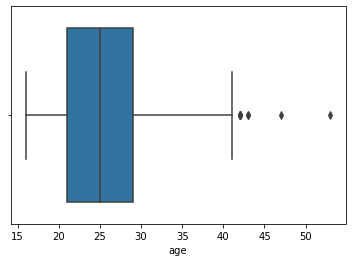

In [133]:
sns.boxplot(x="age", data=df1) # same as sns.boxplot(data["median_home_val"])
plt.show()

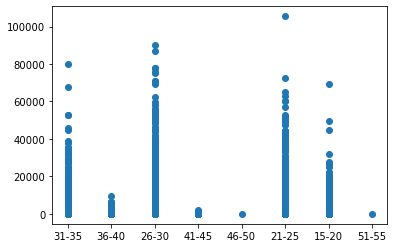

In [134]:
plt.scatter(df1['age_group'], df1['value_k'])
plt.show()

In [140]:
corr_data = df1[['age', 'overall_rating', 'best_overall', 'potential', 'height', 'weight', 'value_k', 'wage_k', 'release_clause_k']]

In [141]:
correlations_matrix = corr_data.corr() 

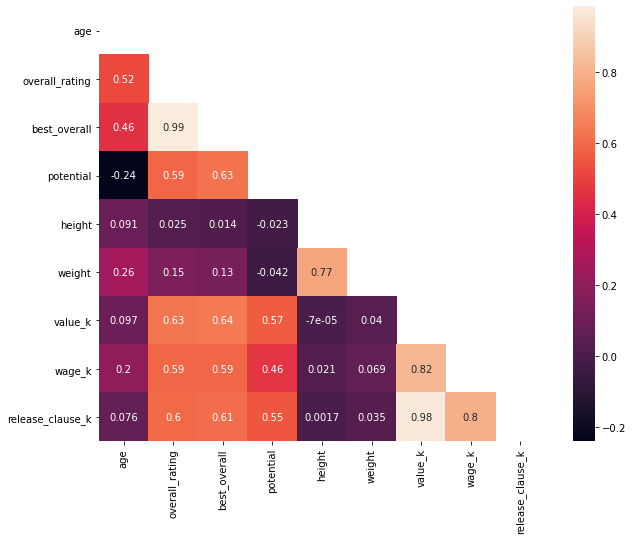

In [142]:
# Coorelation of values with age
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

Result: 
Age and the market value ('value_k') do have a high correlation.
From the displot (x = age_group, y = value) we can see that the age group between 26 to 30 years old have the most highest market values.

### Does 'composure' (good in controlling stress) lifts player's overall rating ?

In [149]:
df1.dtypes['composure']

dtype('float64')

In [153]:
df1.columns[:50]

Index(['id', 'age', 'overall_rating', 'nationality', 'club', 'best_overall',
       'best_position', 'potential', 'height', 'weight', 'foot', 'growth',
       'value_k', 'wage_k', 'release_clause_k', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [162]:
corr_data_2 = df1[['age', 'overall_rating', 'best_overall',
       'potential', 'height', 'weight', 'growth',
       'value_k', 'wage_k', 'release_clause_k', 'attacking', 'crossing',
        'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'composure']]

In [163]:
correlations_matrix = corr_data_2.corr() 

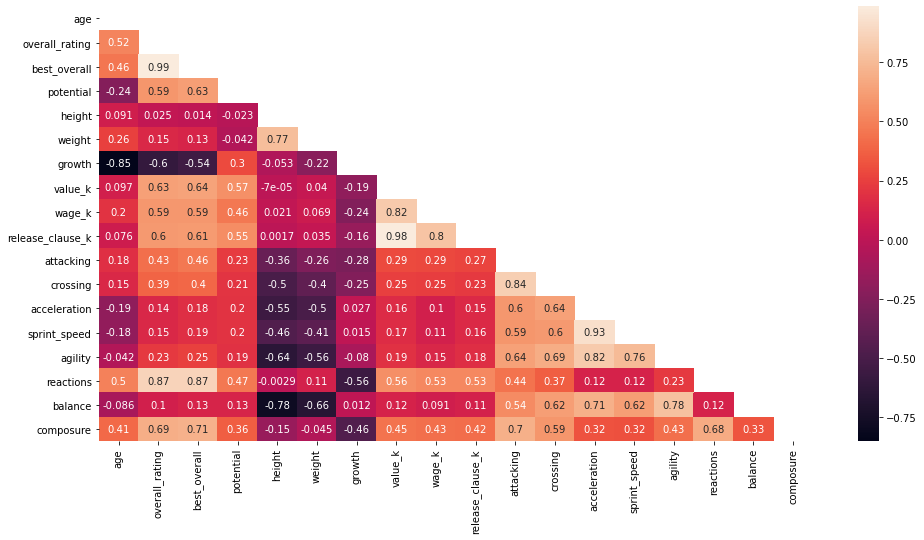

In [165]:
# Coorelation of values with composure
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [173]:
df1_corr = df1.corr()
df1_corr[(df1_corr['composure'] > 0.8) | (df1_corr['composure'] < -0.8)]

,id,age,overall_rating,best_overall,potential,height,weight,growth,value_k,wage_k,release_clause_k,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,week_foot_rate,skill_move,international_reputation,pace,shooting,passing,dribbling,defending,physical,hits,left_strike,striker,right_striker,left_winger,left_forward,center_forward,right_forward,right_winger,left_attacking_mf,center_attacking_mf,right_attacking_mf,left_mf,left_center_mf,center_mf,right_center_mf,right_mf,left_wing_back,left_defence_mf,central_defence_mf,right_defence_mf,rwb,left_back,left_center_back,center_back,right_center_back,right_back,goal_keeper,joined_year,contract_start,contract_end
composure,-0.357438,0.408984,0.694745,0.710593,0.362417,-0.154051,-0.045273,-0.462068,0.446673,0.428818,0.423299,0.704999,0.588033,0.557788,0.514065,0.717054,0.614717,0.708816,0.631189,0.638104,0.594207,0.670277,0.700212,0.477965,0.322133,0.318135,0.427751,0.681867,0.328672,0.699302,0.616155,0.239277,0.5145,0.265461,0.639077,0.74293,0.529542,0.384088,0.609199,0.656698,0.575671,1.0,0.355231,0.393495,0.344177,0.309062,-0.394587,-0.391794,-0.388587,-0.38496,-0.383618,-0.392334,0.778968,0.611005,0.28719,0.566339,0.372303,0.089933,0.364517,0.530064,0.470028,0.301908,0.353614,0.18268,0.707283,0.707283,0.707283,0.683149,0.707264,0.707264,0.707264,0.683149,0.720702,0.720702,0.720702,0.699122,0.758042,0.758042,0.758042,0.699122,0.617174,0.622686,0.622686,0.622686,0.617174,0.574358,0.501983,0.501983,0.501983,0.574358,-0.347105,-0.125495,-0.123165,0.031484


Results: we can see a relatively high correlation between composure and overall_rating which proves that the higher composure the player has, the hight overall_rating the player gets.
Another finding of high correlation is that the higher the composure the player has, the performance (e.g. 'attacking', 'short_passing', 'skills', 'ball_controll', 'reaction', and more values are high. 

### Which position in football has the highest market value?

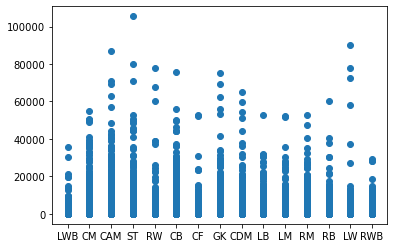

In [176]:
plt.scatter(df1['best_position'], df1['value_k'])
plt.show()